In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
#实现多输出
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
import jieba
import textdistance
import random

In [3]:
data = pd.read_excel('data.xlsx')
data.head()

,Unnamed: 0,PRIMARY_NAME,ALT_NAME,State,Cosine Similarity,Levenshtein Distance,Jaro-Winkler Distance,Jaccard Index,Monge Elkan,MRA,Longest Common Substring,Longest Common Subsequence,In String Search
0,0,gazprombank upravlenie aktivami,gazprombank asset management zao,Match,0.666751,15,0.847686,0.500000,0.024974,4,12,18,0
1,1,gazprombank upravlenie aktivami,closed joint-stock company gazprombank-upravle...,Match,0.731083,30,0.683537,0.534483,0.032258,3,19,30,0
2,2,united instrument manufacturing corporation,jsc-united-instrument-manufacturing-corporation,Match,0.889768,40,0.802099,0.800000,0.021633,3,13,40,0
3,3,gaz-oil ooo,gaz-oil,Match,0.763763,7,0.916667,0.583333,0.069444,4,7,7,1
4,4,ken wong,ken wong kaw,Match,0.816497,8,0.933333,0.666667,0.125000,3,8,8,1


In [4]:
#随机森林

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [6]:
x = data.iloc[:,4:]
y = data.iloc[:,3]


In [7]:
def f(y):
    if y=='Match':
        return 1
    else: 
        return 0
y = [f(y) for y in y.values]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)  #构建训练集以及测试集用于模型的构建

In [128]:
x_train

,Cosine Similarity,Levenshtein Distance,Jaro-Winkler Distance,Jaccard Index,Monge Elkan,MRA,Longest Common Substring,Longest Common Subsequence,In String Search
25550,0.431517,4,0.478065,0.257143,0.048889,0,3,6,0
27440,0.521749,3,0.583333,0.350000,0.048611,0,1,5,0
2491,0.606103,10,0.618176,0.418182,0.028889,0,3,15,0
25726,0.480015,6,0.545622,0.285714,0.056122,0,1,7,0
21802,0.583874,5,0.558153,0.405405,0.039256,1,4,9,0
...,...,...,...,...,...,...,...,...,...
20757,0.849706,19,0.920947,0.730769,0.050000,3,10,19,0
32103,0.417029,4,0.372786,0.230769,0.074074,0,1,4,0
30403,0.576557,9,0.559219,0.379310,0.014053,0,3,11,0
21243,0.376309,6,0.421523,0.187500,0.008264,1,2,6,0


In [129]:
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [9]:
#使用随机搜索找到最佳模型
#树的个数
n_estimators = [int(x) for x in range(200, 2000, 100)]
min_samples_leaf = [2, 4, 6]
min_samples_split = [1, 2, 4]
max_features = ['auto', 'sqrt']
bootstrap = [True, False]
max_depth = [int(x) for x in range(10, 100, 10)]
param_random = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'bootstrap': bootstrap
}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_random, cv=3, verbose=2,
                               random_state=42)
rf_random.fit(x_train, y_train)
# 获得最好的训练模型
best_estimator = rf_random.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1600, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1600, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=  44.9s
[CV] n_estimators=1600, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.8s remaining:    0.0s


[CV]  n_estimators=1600, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=  42.4s
[CV] n_estimators=1600, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=  47.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total=  36.7s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total=  38.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

[CV]  n_estimators=900, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False, total=   0.5s
[CV] n_estimators=900, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False 


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

[CV]  n_estimators=900, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False, total=   0.5s
[CV] n_estimators=900, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False 


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

[CV]  n_estimators=900, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False, total=   0.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=  46.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=  48.9s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.0min
[CV] n_estimators=1600, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

[CV]  n_estimators=1600, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.0s
[CV] n_estimators=1600, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

[CV]  n_estimators=1600, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.9s
[CV] n_estimators=1600, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

[CV]  n_estimators=1600, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.9s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.2s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.7s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.7s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True, total=  47.5s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True, total=  49.4s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=20, bootstrap=True, total=  41.7s
[CV] n_estimators=800, min_samples_split=4, min_samples_leaf=6, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=800, min

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 15.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [1, 2, 4],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900,
                                                         1000, 1100, 1200, 1300,
                                                         1400, 1500, 1600, 1700,
                                                         1800, 1900]},
                   random_state=42, verbose=2)

In [10]:
random_forest = rf_random.best_estimator_
#random_forest.fit(x_train, y_train)

In [99]:
random_forest

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=1000)

In [156]:
importances = random_forest.feature_importances_
print("重要性：",importances)

重要性： [0.14218954 0.03725371 0.30026513 0.10379466 0.06007317 0.01408084
 0.25784684 0.02314078 0.06135531]


<AxesSubplot:>

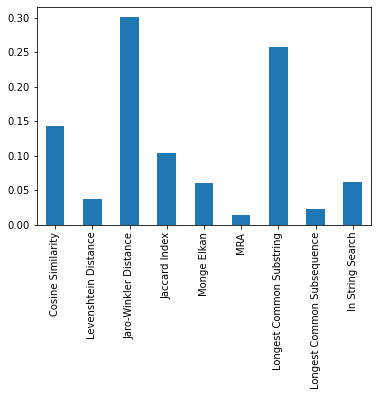

In [170]:
pd.Series(importances,index = x_train.columns).plot(kind = 'bar')

In [12]:
y_pred = random_forest.predict(x_test)

In [130]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

#展示混淆矩阵中的各项指标
def show(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    FP = cm[0,1]
    TN = cm[0,0]

    accuracy = (TP/(TP+FN)+(TN/(TN+FP)))/2
    P = TP/(TP+FP)
    R = TP/(TP+FN)
    F1 = 2/(1/P+1/R)

    print("accracy:",accuracy)
    print("P:",P)
    print("R:",R)
    print("F1:",F1)
    return R

In [14]:
cm1
show(cm1)

array([[10893,    17],
       [   23,   128]], dtype=int64)

accracy: 0.9230619578611274
P: 0.8827586206896552
R: 0.847682119205298
F1: 0.8648648648648649


In [15]:
#XGBoost

In [16]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

In [17]:
clf1 = xgb.XGBClassifier()
param_dist = {
        'n_estimators':range(80,200,4),    
        'colsample_bytree':np.linspace(0.5,1,3),
        'scale_pos_weight':[10]
        }
#使用网格搜索法找到最佳参数
grid = GridSearchCV(clf1,param_dist,cv = 3,scoring = 'f1')

grid.fit(x_train,y_train)

E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [18]:
XGB = grid.best_estimator_
print(XGB)

y_predict = XGB.predict(x_test)
cm2 = confusion_matrix(y_test,y_predict)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [19]:
cm2
show(cm2)

array([[10892,    18],
       [   23,   128]], dtype=int64)

accracy: 0.9230161283469203
P: 0.8767123287671232
R: 0.847682119205298
F1: 0.8619528619528619


In [20]:
# SVM
from sklearn import svm
clf = svm.SVC()

In [21]:
model = svm.SVC(kernel='rbf', probability=True)
param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}
grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:  2.4min finished


GridSearchCV(estimator=SVC(probability=True), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.0001]},
             verbose=1)

In [22]:
svm = grid_search.best_estimator_
print(svm)

SVC(C=1000, gamma=0.001, probability=True)


In [23]:
y_predict = svm.predict(x_test)

In [24]:
cm3 = confusion_matrix(y_test,y_predict)
cm3
show(cm3)

array([[10900,    10],
       [   41,   110]], dtype=int64)

accracy: 0.8637801154539549
P: 0.9166666666666666
R: 0.7284768211920529
F1: 0.8118081180811807


In [25]:
#logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression() #调用逻辑回归模型
lr_model.fit(x_train,y_train)
y_predict = lr_model.predict(x_test)
cm4 = confusion_matrix(y_test,y_predict)
show(cm4)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

accracy: 0.866587249075822
P: 0.8409090909090909
R: 0.7350993377483444
F1: 0.7844522968197879


In [106]:
cm4
show(cm4)

array([[10889,    21],
       [   40,   111]], dtype=int64)

accracy: 0.866587249075822
P: 0.8409090909090909
R: 0.7350993377483444
F1: 0.7844522968197879


In [136]:
#Neural Network
from sklearn import neural_network
R = 0

for i in [5,20,50,100,200,1000]:
    mlp=neural_network.MLPClassifier(hidden_layer_sizes=(i), #隐藏层
                                     #（10,20）指的是隐藏层层数+每层单元数
                                    activation='relu',  #激活函数
                                    solver='adam',
                                    alpha=0.0001,  #正则化项系数
                                    batch_size='auto',
                                    learning_rate='constant',  #学习率
                                    learning_rate_init=0.001,
                                    power_t=0.5,
                                    max_iter=200,  #迭代次数
                                    tol=1e-4)
    mlp.fit(x_train,y_train)
    y_predict = mlp.predict(x_test)
    cm5 = confusion_matrix(y_test,y_predict)
    if show(cm5)>R:
        R = show(cm5)
        best_estimator = mlp

MLPClassifier(hidden_layer_sizes=5)

accracy: 0.8370150721435465
P: 0.864406779661017
R: 0.6754966887417219
F1: 0.758364312267658
accracy: 0.8370150721435465
P: 0.864406779661017
R: 0.6754966887417219
F1: 0.758364312267658


MLPClassifier(hidden_layer_sizes=20)

accracy: 0.876475194396052
P: 0.8382352941176471
R: 0.7549668874172185
F1: 0.794425087108014
accracy: 0.876475194396052
P: 0.8382352941176471
R: 0.7549668874172185
F1: 0.794425087108014


MLPClassifier(hidden_layer_sizes=50)

accracy: 0.8733930836889421
P: 0.8692307692307693
R: 0.7483443708609272
F1: 0.804270462633452


MLPClassifier(hidden_layer_sizes=100)

accracy: 0.9086253573791587
P: 0.7425149700598802
R: 0.8211920529801324
F1: 0.779874213836478
accracy: 0.9086253573791587
P: 0.7425149700598802
R: 0.8211920529801324
F1: 0.779874213836478


MLPClassifier(hidden_layer_sizes=200)

accracy: 0.8701276549250034
P: 0.875
R: 0.7417218543046358
F1: 0.8028673835125448


MLPClassifier(hidden_layer_sizes=1000)

accracy: 0.8670455442178935
P: 0.9098360655737705
R: 0.7350993377483444
F1: 0.8131868131868131


In [140]:
cm5

array([[10899,    11],
       [   40,   111]], dtype=int64)

In [141]:
#mlp.fit(x_train,y_train)
y_predict = best_estimator.predict(x_test)
cm5 = confusion_matrix(y_test,y_predict)
cm5
show(cm5)

array([[10867,    43],
       [   27,   124]], dtype=int64)

accracy: 0.9086253573791587
P: 0.7425149700598802
R: 0.8211920529801324
F1: 0.779874213836478


0.8211920529801324

In [121]:
import textdistance
def clean_string(str1):
    str1 = str1.lower()
    str1 =str1.replace('mr.','')
    str1 =str1.replace('mrs.','')
    str1 =str1.replace('\n',' \n')
    str1 =str1.replace('\n',' \n')
    str1 =str1.replace('\n',' \n')
    str1 =str1.replace('.',' ')
    str1 =str1.replace(',',' ')
    str1 =str1.replace('\'','')
    str1 =str1.replace(' & ',' and ')
    str1 =str1.replace(' &',' and ')
    str1 =str1.replace('& ',' and ')
    str1 =str1.replace('&',' and ')
    str1 =str1.replace(' l p ',' lp ')
    str1 =str1.replace('l l p ','llp ')
    str1 =str1.replace('l l c ','llc ')
    str1 =str1.replace(' ltd ',' limited ')
    str1 =str1.replace(' p l c ',' plc')
    str1 =str1.replace(' co ltd ',' company limited ')
    str1 =str1.replace(' co ',' company ')
    str1 =str1.replace(' corp ',' corporation ')
    str1 =str1.replace(' univ ',' university ')
    str1 =str1.replace(' fdtn ',' foundation ')
    str1 =str1.replace(' inc ',' incorporated ')
    str1 =str1.replace(' assoc ',' association ')
    str1 =str1.replace(' mgmt ',' management ')
    str1 =str1.replace(' svsc ',' services ')
    str1 =str1.replace(' ag ',' aktiengesellschaft ')
    str1 =str1.replace(' govt ',' goverment ')
    str1 =str1.replace(' svgs ',' savings ')
    str1 =str1.replace(' intl ',' international ')
    str1 =str1.replace('intl ','international ')
    str1 =str1.replace(' investmentco lt ',' investment company limited ')
    str1 = str1.replace('the ','')
    str1 = str1.replace(' the ','')
    str1 = str1.strip()
    return str1

def InstringSerch(a,b):
    return int(a in b or b in a)


def get_similarity(a,b):
    a = clean_string(a)
    b = clean_string(b)
    Cosine_Similarity = textdistance.cosine.similarity(a,b)
    Levenshtein_Distance = textdistance.levenshtein.distance(a,b)
    Jaro_Winkler_Distance = textdistance.jaro_winkler.similarity(a,b)
    Jaccard_Index = textdistance.jaccard.similarity(a,b)
    Monge_Elkan = textdistance.monge_elkan.similarity(a,b)
    MRA = textdistance.mra.similarity(a,b)
    Longest_Common_Substring = textdistance.lcsstr.similarity(a,b)
    Longest_Common_ubsequence = textdistance.lcsseq.similarity(a,b)
    In_String_Search = InStringSerch(a,b)
    return pd.DataFrame({'Cosine Similarity':Cosine_Similarity,'Levenshtein Distance':Levenshtein_Distance,
            'Jaro-Winkler Distance':Jaro_Winkler_Distance,'Jaccard Index':Jaccard_Index,'Monge Elkan':Monge_Elkan,
            'MRA':MRA,'Longest Common Substring':Longest_Common_Substring,
            'Longest Common Subsequence':Longest_Common_ubsequence,'In String Search':In_String_Search},index = [0])

In [122]:
a = 'avs'
b = 'acs sdw'

In [123]:
get_similarity(a,b)

,Cosine Similarity,Levenshtein Distance,Jaro-Winkler Distance,Jaccard Index,Monge Elkan,MRA,Longest Common Substring,Longest Common Subsequence,In String Search
0,0.436436,5,0.650794,0.25,0.222222,0,1,2,0


In [217]:
a = input("请输入第一个字符串:")
b = input("请输入第二个字符串:")
get_similarity(a,b)
print('您输入的字符串分别为：'+str(a)+' , '+str(b))
print(['Match' if random_forest.predict(get_similarity(a,b))[0]==1 else 'Not Match'][0])

请输入第一个字符串:AMILIAWONG
请输入第二个字符串:AMELIA WONG


,Cosine Similarity,Levenshtein Distance,Jaro-Winkler Distance,Jaccard Index,Monge Elkan,MRA,Longest Common Substring,Longest Common Subsequence,In String Search
0,0.858116,2,0.895219,0.75,0.1,6,4,9,0


您输入的字符串分别为：AMILIAWONG , AMELIA WONG
Match


In [146]:
def get(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    FP = cm[0,1]
    TN = cm[0,0]

    accuracy = (TP/(TP+FN)+(TN/(TN+FP)))/2
    P = TP/(TP+FP)
    R = TP/(TP+FN)
    F1 = 2/(1/P+1/R)

    return [accuracy,P,R,F1]

In [149]:
cm_list = [cm1,cm2,cm3,cm4,cm5]

In [152]:
dic = {}
dic['accuracy'] = [get(i)[0] for i in cm_list]
dic['P'] = [get(i)[1] for i in cm_list]
dic['R'] = [get(i)[2] for i in cm_list]
dic['F1'] = [get(i)[3] for i in cm_list]

In [155]:
pd.DataFrame(dic,index = ['random_forest','xgboost','svm','logistic_regression','Neural Network'])

,accuracy,P,R,F1
random_forest,0.923062,0.882759,0.847682,0.864865
xgboost,0.923016,0.876712,0.847682,0.861953
svm,0.863780,0.916667,0.728477,0.811808
logistic_regression,0.866587,0.840909,0.735099,0.784452
Neural Network,0.908625,0.742515,0.821192,0.779874
